<h1><center>Linear Regression

<h1><center>Linear Regression with sklearn

Linear models are the vanilla ice cream of mathematical modeling.  However, they are probably the most common and simple to use.  For the most part we live in a world where linear models work for many situations.  In many cases, the data is linear and a linear model will work very well.  However, even when the data is not linear, linear models can still work, especially when we're not straying too far from the original data set and/or we know the actual model is non-linear but we think a linear approximation is "close enough".  Even if it is vanilla, it's still tasty and it is one of the most popular types of ice cream out there! 

The most common solution to fit a line to a set of data is to minimize the least-square error between all data points and the line.  sklearn provides a simple regression tool we will use to explore the diabetes dataset.

We can write a set of linear equations as:

Ax = b

Where A is a matrix, x and b are both vectors having the same number of variables as there are rows in matrix A.  For example, in 2 dimensions we would have:
<br> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;|a11, a12|</br>
<br> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;|a21, a22|</br>
<br>A = |a31, a32| </br>
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;|a41, a42|</br>
<br> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;|a51, a52|</br>

x = |x1, x2|

b = |b1, b2, b3, b4, b5|

We want to find x1, x2 that will satisfy the equation


We can multiply both sides of the equation by A<sup>T</sup> so we get:

A<sup>T</sup> A x = A<sup>T</sup>b

Solving for x:

x = |A<sup>T</sup> A|<sup>-1</sup> A<sup>T</sup>b

We will use one of the databases built-in to sklearn.  First we load the relvant python packages:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.datasets import load_diabetes
from sklearn.metrics import mean_squared_error, r2_score

The sklearn.datasets contain a variety of built-in datasets that can be used to develop machine models.  
numpy is a great package, but pandas dataframes have far more flexibility.  The data in sklearn will be loaded into numpy arrays and converted to a pandas dataframe.
We will load data from the diabetes data set:

In [2]:
diabetes = load_diabetes()
data = np.c_[diabetes.data, diabetes.target]
columns = np.append(diabetes.feature_names, ["target"])
ddata = pd.DataFrame(data, columns = columns)
ddata.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,442.0,-3.639623e-16,0.047619,-0.107226,-0.037299,0.005383,0.038076,0.110727
sex,442.0,1.309912e-16,0.047619,-0.044642,-0.044642,-0.044642,0.050680,0.050680
bmi,442.0,-8.013951e-16,0.047619,-0.090275,-0.034229,-0.007284,0.031248,0.170555
bp,442.0,1.289818e-16,0.047619,-0.112400,-0.036656,-0.005671,0.035644,0.132044
s1,442.0,-9.042540e-17,0.047619,-0.126781,-0.034248,-0.004321,0.028358,0.153914
s2,442.0,1.301121e-16,0.047619,-0.115613,-0.030358,-0.003819,0.029844,0.198788
s3,442.0,-4.563971e-16,0.047619,-0.102307,-0.035117,-0.006584,0.029312,0.181179
s4,442.0,3.863174e-16,0.047619,-0.076395,-0.039493,-0.002592,0.034309,0.185234
s5,442.0,-3.848103e-16,0.047619,-0.126097,-0.033249,-0.001948,0.032433,0.133599
s6,442.0,-3.398488e-16,0.047619,-0.137767,-0.033179,-0.001078,0.027917,0.135612


We can see that the above data has already been scaled and centered around zero.  Note that the mean values are all close to zero, the 25th %ile is negative, the 75th %ile is positive, all the mins are negative and all the max values are positive witih min and max values between -1 and +1

A description of the data is abailable at: https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html<br>
The original data set is available at: https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt<br>
and here: https://www4.stat.ncsu.edu/~boos/var.select/diabetes.read.tab.out.txt<br>
the scaled data, with mean=0 can be viewed at: https://www4.stat.ncsu.edu/~boos/var.select/diabetes.read.rdata.out.txt

In [3]:
#NOTE about np.c_
#In: np.c_[np.array([[1,2,3]]), 0, 0, np.array([[4,5,6]])]
#Out: array([[1, 2, 3, 0, 0, 4, 5, 6]])#
#The above two lines are the same as:
#In: np.concatenate([np.array([[1,2,3]]), [[0]], [[0]], np.array([[4,5,6]])], axis=1)
#Out: array([[1, 2, 3, 0, 0, 4, 5, 6]])

In [4]:
#For more information about the data, we can print the sklearn "DESCR"
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

We will explore the data to get a better handle on what it looks like.  The seaborn (sns) graphing package has some powerful tools that we will take advantage of.  sns.pairplot allows a comparison of multiple variables. The diabetes data set has 10 variables and one target.  We will plot the diabetes variables three at a time, we will include gender (i=1) and the target variable (i=10) in all pairwise plots:

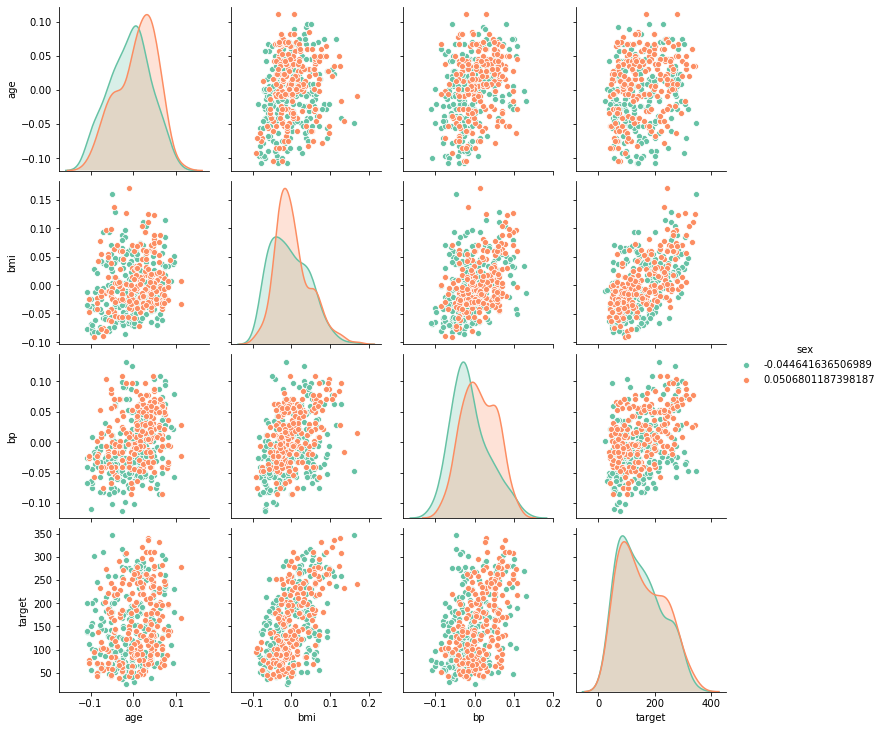

In [5]:
i=0
sns.pairplot(data=ddata.iloc[:,[i, 1, i+2,i+3, 10]], hue="sex", palette='Set2')

Notice that the bmi vs target has a linear correlation.  Gender is plotted as different colors in the above set of variables (variable set i=1).  The data set does not specify which gender is negative vs positive.  

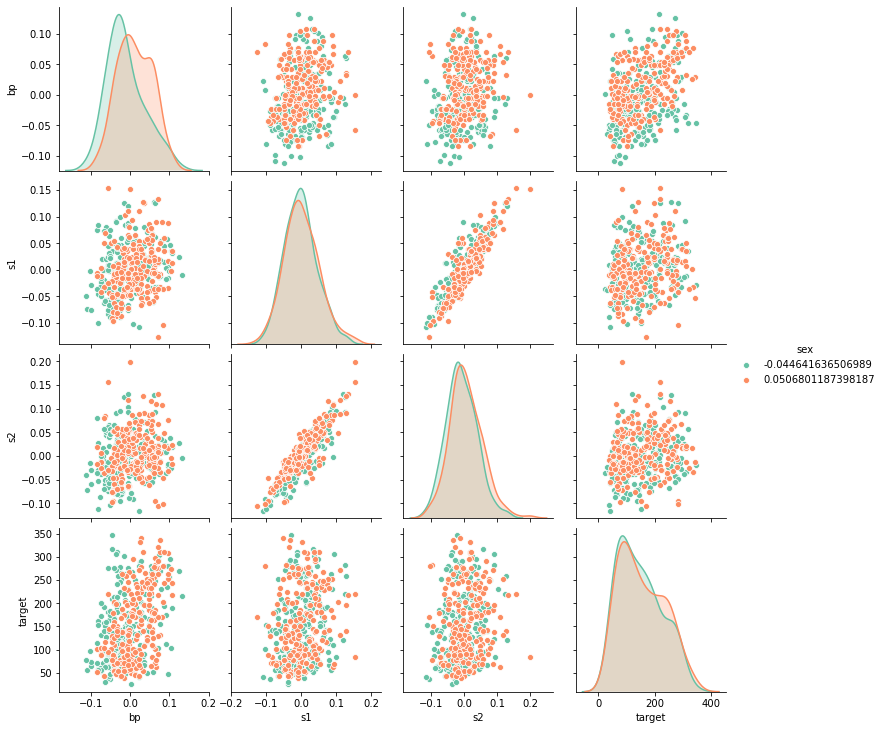

In [6]:
i=3
sns.pairplot(data=ddata.iloc[:,[1, i,i+1,i+2, 10]], hue="sex", palette='Set2')

We see that the variables S1 vs s2 have a strong linear trend.

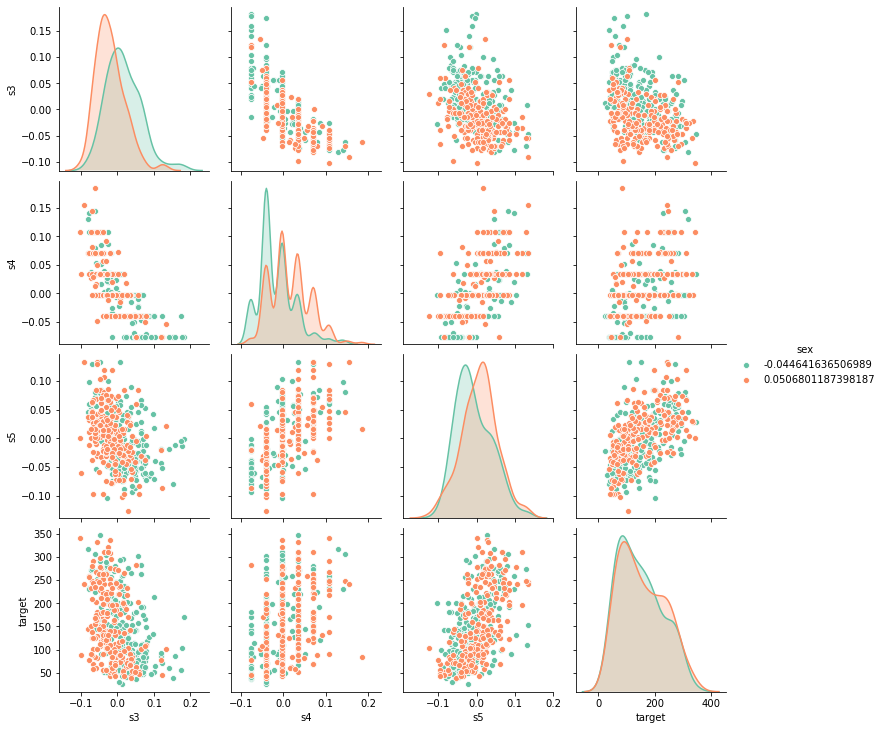

In [7]:
i=6
sns.pairplot(data=ddata.iloc[:,[1,i,i+1,i+2, 10]], hue="sex", palette='Set2')

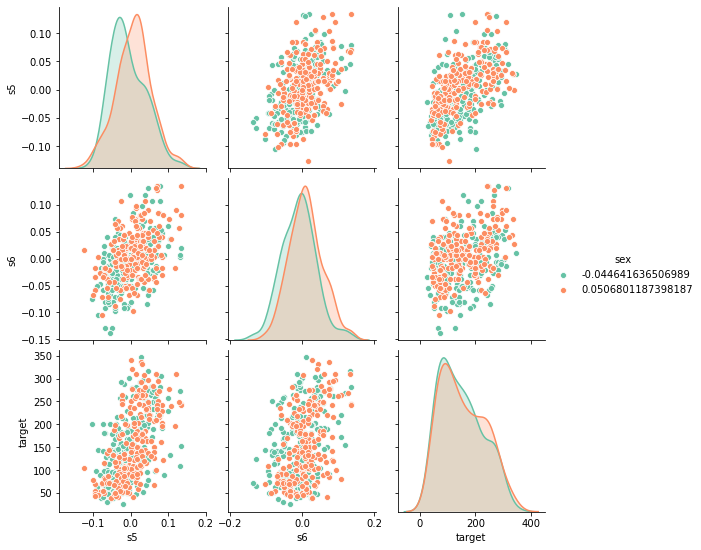

In [8]:
i=8
sns.pairplot(data=ddata.iloc[:,[1, i,i+1,i+2]], hue="sex", palette='Set2')

We see weak linear correlations for most variables.  Also note that most of the distribution patterns are somewhat normally distributed. We also see minor variations based on gender.  In this exercise we will not explore the normal distribution nor will we explore variations based on gender. 

Also note that this is not a complete pair-pair set of plotting, there are 10 variables and one target, so 66 plots would be needed to capture each pair (note for example, s5 vs s6 is the same as s6 vs s5 except the x-y axes are reversed). 

We will divide the data set into an X and y array, where X denotes <strong><u>ONLY the BMI</u></strong> variable described above since that was the variable that had the strongest looking trend. We will use the sklearn linear regression tools on the above data set.

In [9]:
#diabetes_X=ddata.iloc[:,0:9]
diabetes_X = pd.DataFrame(ddata.iloc[:,2])
diabetes_X

,bmi
0,0.061696
1,-0.051474
2,0.044451
3,-0.011595
4,-0.036385
...,...
437,0.019662
438,-0.015906
439,-0.015906
440,0.039062


In [10]:
diabetes_y = pd.DataFrame(ddata.target)
diabetes_y

,target
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0
...,...
437,178.0
438,104.0
439,132.0
440,220.0


We will use all but 20 data sets in the training data, we will reserve the last 20 data point as test data

In [11]:
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

We will load the linear model

In [12]:
regr = linear_model.LinearRegression()

In [13]:
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
diabetes_y_pred = regr.predict(diabetes_X_test)

We can print the regression coefficients:

In [15]:
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [[938.23786125]]


In [16]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))

Mean squared error: 2548.07
Coefficient of determination: 0.47


We will plot the test data, the trial data and the predicted outcome:

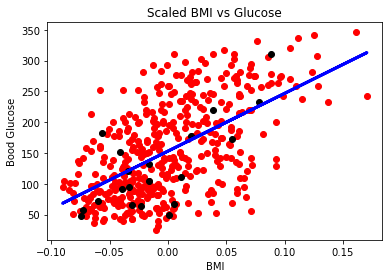

In [17]:
plt.scatter(diabetes_X_train, diabetes_y_train,  color='red')
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_train, regr.predict(diabetes_X_train), color='blue', linewidth=3)
plt.title("Scaled BMI vs Glucose")
plt.xlabel("BMI")
plt.ylabel("Bood Glucose")
plt.show()